<b><font size="5">Face Detetcion and Recognition with LBPH Algorithm</font><br></b>

<font size="4">Introduction:</font>
<br>
<br>
<p><font size="3">A facial recognition system is a technology capable of matching a human face from a digital image or a video frame against a database of faces. Face recognition systems have been widely used in recent times on smartphones and in other forms of technology, such as robotics and identity verification.</font></p>
<p><font size="3">The theory behind facial recognition is the ability of distinguishing landmarks or nodal points on faces. Each human face has 80 nodal points. Facial recognition software will analyze the nodal points such as the distance between your eyes or the shape of your cheekbones. The analysis of face is then turned into a mathematical formula. This numerical code is called a faceprint. Similar to the unique structure of a thumbprint, each person has their own faceprint. The faceprint is then compared against a database of other faceprints which has photos with identification that can be compared.</font></p>

<font size="4">Overview:</font>
<br>
<br>
<p><font size="3">In this project, we are going to develope a face recognition system which will be able to detect and recognize faces. The trained model will be tested on unseen images to evaluate accuracy metrics. This project's aim is to use a so called Local Binary Pattern Histograms algorithm which is accessible in Python's OpenCV library. LBPH combines Local Binary Pattern and Histograms of Oriented Gradients (HOG) algorithms. LBP is a simple yet efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number. Combining LBP with HOG highly improves the face detection performance.</font></p>
<p><font size="3">The images we will work with is the ORL_faces.npz dataset which is an open source library in numpy. The dataset contains 400 images of 40 different person's face which means there are 10 images belonging to every person. It can be downloaded from the following link: <a href="https://gitlab.com/knork/data">Click here</a></font></p>
<p><font size="3">In the first phase of the project we will study how faces are detected in terms of accuracy and quality. Then, we will focus on face recognition in the next section inculiding evaluating accuracy on test set and displaying system's output images.</font></p>
<p><font size="3">After learning about the process, let's get started.</font></p>

In [1]:
# Import all necessary libraries we will work with
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<p><font size="3">First of all, let's read in dataset and inspect a couple of images.</font></p>

In [2]:
# Load data
data = np.load('ORL_faces.npz')
# load the "Train Images"
x_train = np.array(data['trainX'], dtype='uint8')
x_test = np.array(data['testX'], dtype='uint8')

# load the Label of Images
y_train = data['trainY']
y_test = data['testY']

In [3]:
# Reshape our dataset (we create a 2-dimensional numpy array from a 1-dimensional array)
height = 112
width = 92
shape = (height, width)

x_train = x_train.reshape(x_train.shape[0], *shape)
x_test = x_test.reshape(x_test.shape[0], *shape)

print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (240, 112, 92)
Shape of y_train: (240,)
Shape of x_test: (160, 112, 92)
Shape of y_test: (160,)


<p><font size="3">So we have 240 images for training (6 from each person) and 160 images for testing (4 from each person).</font></p>

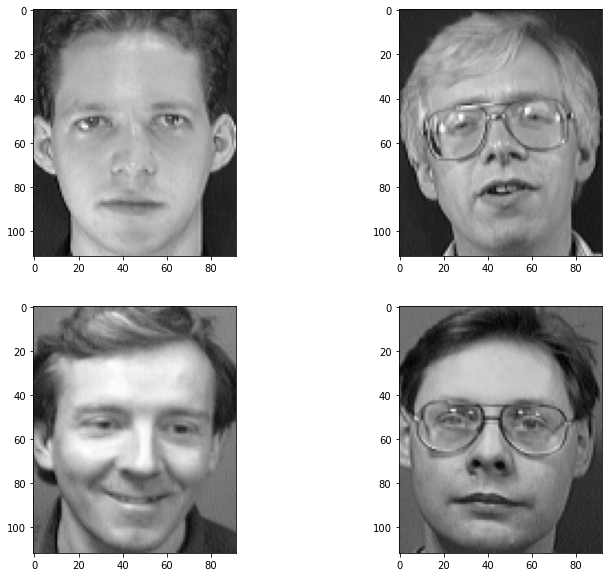

In [4]:
# Let's inspect images from 4 different persons (in grayscale)

plt.figure(figsize=(12,10))

for count, index in enumerate(range(0, 48, 12)):
    # plot images
    plt.subplot(221+count)
    plt.imshow(x_train[index].reshape(112, 92), cmap='gray')

In [5]:
# Every image has the same size of 112 by 92 with 1 color channel (grayscale)
print('Shape of images:', x_train[0].shape)

Shape of images: (112, 92)


<font size="3">As we can see, frontal face images are croped, cut and center aligned in order to improve face recognition accuracy and avoid the algorithm to wrongly recognize and classify other faces (from the background) which are out of interest.</font>

<p><font size="4">Face Detection</font></p>
<br>
<br>
<font size="3">Here in this section, we will deal with face detection. For detection, I will use one of OpenCV's pre-trained classifiers (an XML file) used for face detection. First, we need to load the required XML classifier, then load our input image.</font><br>
<font size="3">OpenCV has several buil-in classifiers for face classification, for frontal face detection. One of the most frequently used classifier is the haarcascade_frontalface_default.xml classifier which can reach fairly good performances.</font><br>

In [6]:
# Let's load the classifier
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [7]:
# Now let us create some methods we will work with

# This method's aim is to detect faces only. In the next step, we are going to find out how 
# many faces can be detected out of all images.
def detect_face(image):
    # Detect faces with a Frontal Face Cascade Classifier
    face_rects = face_cascade.detectMultiScale(image, scaleFactor=1.05, minNeighbors=1)
    # I did experiment with these parameters and found out that these paramters gave the best
    # results/highest detection rate.
    
    # check if face is detected or not
    if face_rects == ():
        return False
    else:
        return True

# This funcion detects faces and draw rectangles on it for observing purposes.
def detect_face_and_draw_rectangle(image):
    # Detect faces with a Frontal Face Cascade Classifier
    face_rects = face_cascade.detectMultiScale(image, scaleFactor=1.05, minNeighbors=1) 
    # I did experiment with these parameters and found out that these paramters gave the best
    # results/highest detection rate.
    
    # check if face is detected or not
    if face_rects == ():
        return image, False
    
    # Draw rectangle on detected face
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,0), 1)
    return image, True

Face detected: True
Face detected: True
Face detected: False


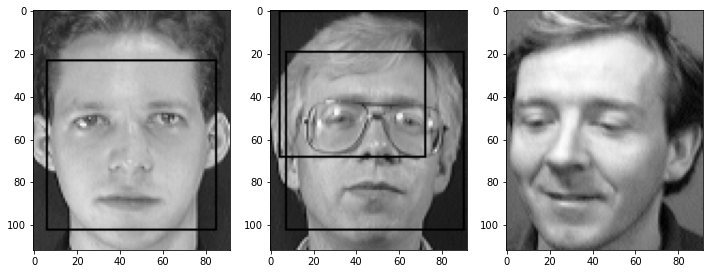

In [8]:
# Let's have a look an example how it works on the first image

# Run the method and plot the image
plt.figure(figsize=(12, 8))
for count, index in enumerate([0, 13, 28]):
    
    image, detected = detect_face_and_draw_rectangle(x_train[index])

    print('Face detected:', detected)
    plt.subplot(131+count)
    plt.imshow(image, cmap='gray')
# I deliberately selected these facial images which show how a correctly detected face (1st image),
# a wrongly detected faces multiple times (2nd image) and an undetected face (3rd image) look like.

<font size="3">Now we are going to examine how many faces can be detected with haarcascade_default classifier.</font>

In [9]:
def count_detected_faces(dataset):
    # Loop over every images we have stored in folders and check how many faces are detected
    counter = 0
    detected_images = 0
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

    for index in range(len(dataset)):
        counter += 1 # count how many images we have in total
        
        detected = detect_face(dataset[index])

        if detected is True:
            detected_images += 1
    
    print('Total number of detected faces:', detected_images)
    print('Face detetcion ratio:', round(detected_images/counter, 4))

In [10]:
# haarcascade_frontalface_default on training images
count_detected_faces(dataset=x_train)

Total number of detected faces: 236
Face detetcion ratio: 0.9833


<font size="3">So it could detect 236 faces out of 240 training images.</font>

In [11]:
# haarcascade_frontalface_default for testing images
count_detected_faces(dataset=x_test)

Total number of detected faces: 159
Face detetcion ratio: 0.9938


<font size="3">On testing images it could reach a 99.38% accuracy (only 1 face was not detected).</font>

<p><font size="4">Build the Face Recognition Model (default)</font></p>
<br>
<br>
<font size="3">In this part, we are going to create a Face Recognition model using haarcascade_frontalface_default.xml classifier and test it on unseen images to evaluate accuracy.</font>

In [12]:
def detect_and_predict(scaleFactor, minNeighbors):

    x_train_roi = []
    y_train_detected = []

    # Here we use our haarcascade_frontalface_default classifier
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    recognizer = cv2.face.LBPHFaceRecognizer_create() # create the LBPH recognizer object

    # loop over every images
    for index, train_image in enumerate(x_train):
        # detect faces
        faces = face_cascade.detectMultiScale(train_image, scaleFactor=scaleFactor, 
                                              minNeighbors=minNeighbors)
        # Check if face was detected
        if faces == ():
            continue
        # get Region Of Interest (detected faces)
        for x, y, w, h in faces:
            roi_train = train_image[y:y+h, x:x+w]
            x_train_roi.append(roi_train)
            y_train_detected.append(int(y_train[index]))
    # finally we can train our face recognizing model
    recognizer.train(x_train_roi, np.array(y_train_detected))

    # Recognize faces on test images
    # We will use our previously trained recognizer's predict method to identify faces.
    
    correct_preds = 0
    predictions = []
    count = 1

    plt.figure(figsize=(14, 40))
    for index in range(len(x_test)):
        
        test_image = x_test[index]
        face = face_cascade.detectMultiScale(test_image, scaleFactor=scaleFactor, 
                                             minNeighbors=minNeighbors)
        
        if face == ():
            detected = False
        else:
            detected = True

        # draw rectangles and put text on identyfied test images
        for x, y, w, h in face:

            roi_test = test_image[y:y+h, x:x+w]
            id_, _ = recognizer.predict(roi_test)
            if id_ == y_test[index]:
                correct_preds += 1
                flag = True
            else:
                flag = False
            predictions.append(id_)
            
            # Draw rectangle
            cv2.rectangle(test_image, (x,y), (x+w,y+h), (0,0,0), 1)
        
        # Plot every 8th (unique) test images and check out the results
        if index % 8 == 0:
            
            plt.subplot(10, 2, count)
            plt.imshow(test_image, cmap='gray')
            # Highlight title with green if prediction is correct, else it is red
            if flag and detected:
                plt.title('Correct', color='green', size=14)
            else:
                plt.title('Incorrect', color='red', size=14)
            count += 1
        
    return correct_preds, predictions

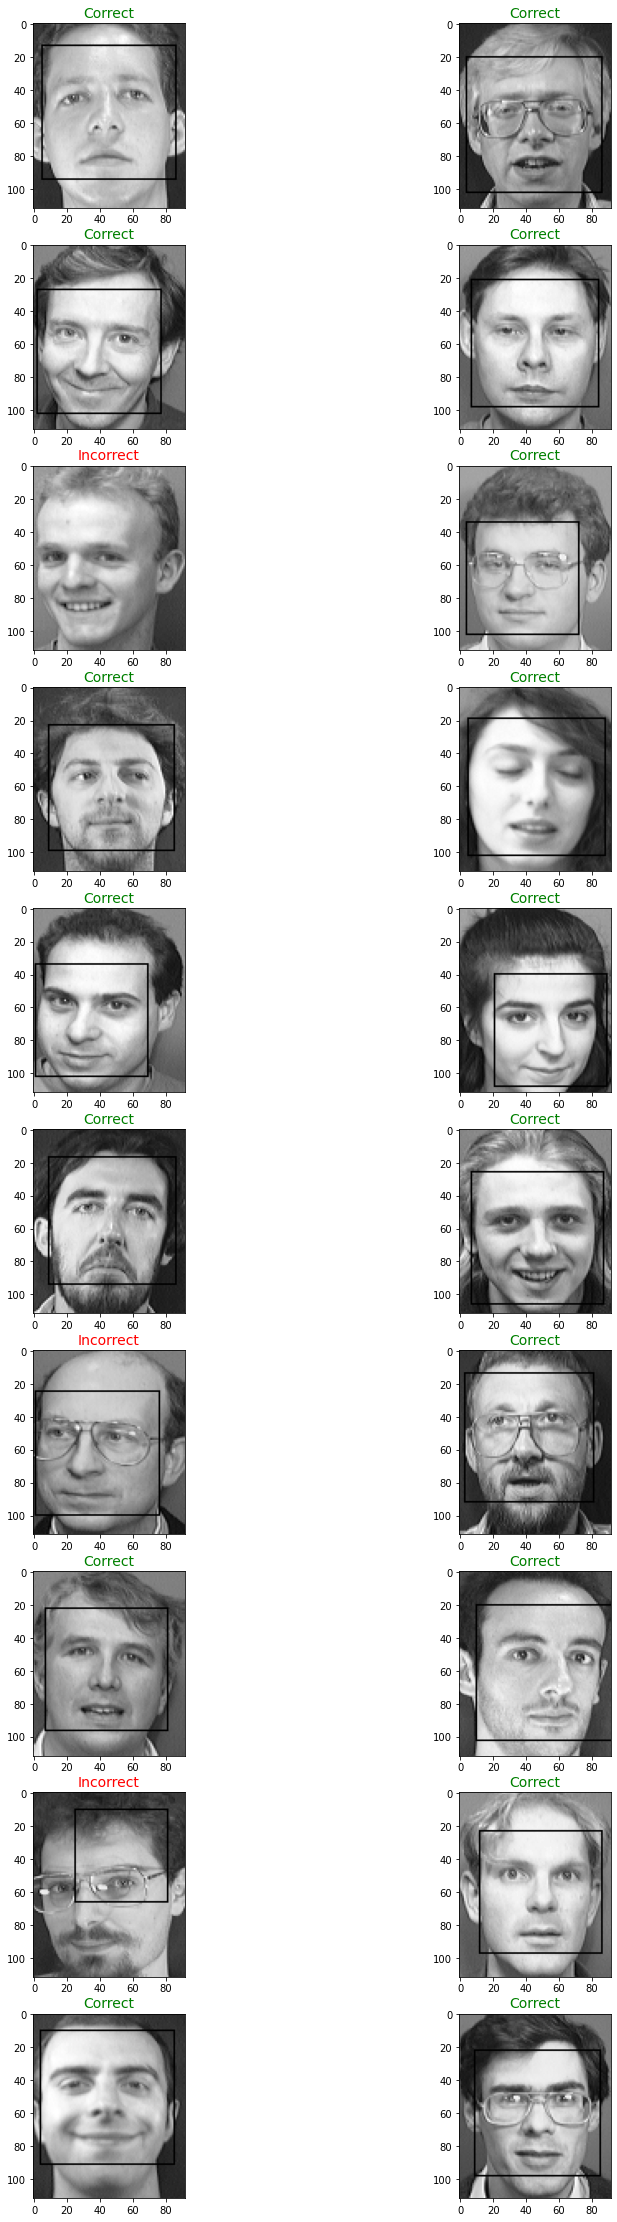

In [13]:
# Run the detect_and_predict() method
correct_preds, predictions = detect_and_predict(scaleFactor=1.05, minNeighbors=3)

<font size="4">Accuracy with the default frontal face classifier:</font>

In [14]:
# Face recognition accuarcy
test_img_total = len(y_test)
print('Number of correct predictions:', correct_preds)
print('Accuracy:', round(correct_preds/test_img_total, 4))

Number of correct predictions: 142
Accuracy: 0.8875


<p><font size="3">This is a pretty good accuracy considering that we were working with a small dataset. Theoretically, the larger the dataet the more accurate face recognition is. The prediction was correct if face was detected and recognized. Some faces were not even detected thus those predictions were incorrect (shown in red). I was experimenting choosing the best parameters (scaleFactor and minNeighbors) to reach the highest accuracy. ScaleFactor is for specifying how much the image size is reduced at each image scale. mMnNeighbors param is for specifying how many neighbors each candidate rectangle should have to retain it. On the other hand, I had to took into consideration to avoid multiple face detections which might give us missleading prediction accuracy because the system may draw face rectangles on areas where there is no face at all (e.g. it finds a face in the background etc.).</font></p>
<p><font size="3">Furthermore, we succesfully could recognize faces wearing glasses, turned away or were not directly looking into the camera which could have made the system difficult to recognize.</font></p>

<font size="4">Conlusion:</font>
<br>
<br>
<font size="3">In this project, we could deploy a face recognition system which was capable of detecting and recognizing faces on grayscaled test images with a 88.75% accuracy. LBPH is a simple yet efficient algorithm which did not have computationally highly expensive complexity, the whole script could run in a matter of seconds on this relatively small data.</font>